# Ondas Propagantes

Conceptos básicos.

In [5]:
import math
import numpy as np
from scipy.integrate import odeint, ode, solve_ivp
import matplotlib.pyplot as plt

import matplotlib.animation
from IPython.display import HTML


In [45]:
class Wave:
    """
    Al informar la frecuencia (en Hz) ingresar +f o -f según la dirección de propagación.
    """

    
    def __init__(self, L, f, A, phi):
        self.L = L
        self.k = 2 * math.pi / L
        self.f = f
        self.w = 2 * math.pi * f
        self.A = A
        self.phi = phi
        self.xp = 0  # Un valor particular de x.
        self.tp = 0  # Un valor particular de t.
        
    def yt(self, x):
        return self.A*math.cos(self.k * x + self.w * self.tp + self.phi)
    
    def set_xp(self, x):
        self.xp = x
    
    def set_tp(self, t):
        self.tp = t
        

In [46]:
onda = Wave(1,-1,1,0)

In [51]:
onda.set_tp(1.1)
x = np.linspace(0, 4, 1000)
y = [onda.yt(xi) for xi in x] 

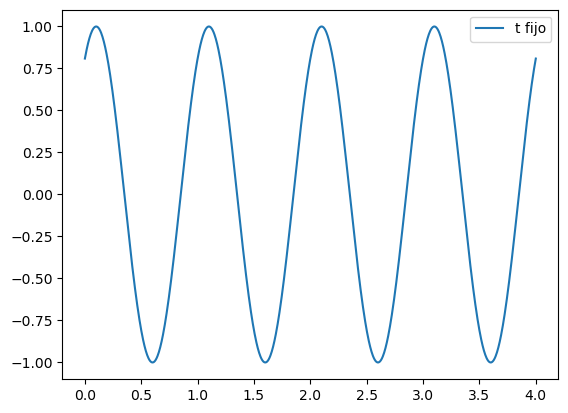

In [52]:
plt.plot(x, y, label="t fijo")
plt.legend();

In [6]:
t = np.linspace(0,2*np.pi)
x = np.cos(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t), interval=50)
plt.close()

from IPython.display import HTML
# HTML(ani.to_jshtml())
HTML(ani.to_html5_video())

In [3]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def data_gen():
    for cnt in itertools.count():
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 1)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

# Only save last 100 frames, but run forever
ani = animation.FuncAnimation(fig, run, data_gen, interval=10, init_func=init,
                              save_count=100)

plt.close()

from IPython.display import HTML
# HTML(ani.to_jshtml())
HTML(ani.to_html5_video())